In [1]:
import pandas as pd
from textblob import TextBlob

data = pd.read_csv('output/translated_cleared.csv')
data.head(5)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 97302: invalid start byte

In [2]:
data_tweet = list(data['cleared_translate'])
polarity = 0

status = []
positive_total = negative_total = neutral_total = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polarity += analysis.polarity
  
  if analysis.sentiment.polarity > 0.0:
    positive_total += 1
    status.append('Positive')
  elif analysis.sentiment.polarity == 0.0:
    neutral_total += 1
    status.append('Neutral')
  else:
    negative_total += 1
    status.append('Negative')
  total += 1

print(f'Analyst Sentiment Result:\nPositive = {positive_total}\nNeutral = {neutral_total}\nNegative = {negative_total}')
print(f'\nTotal Data : {total}')

Analyst Sentiment Result:
Positive = 1052
Neutral = 579
Negative = 166

Total Data : 1797


In [3]:
data['Classification'] = status
data.head(5)

,Unnamed: 0,full_text,username,cleaned,case_fold,token,stop,stemmed,second_cleaned,label,Classification
0,0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,This unit of the minister's sited house was co...,Negative
1,1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,"Alhamdulillah, thank you, Mr. Rudi and Jajar, ...",Positive
2,2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,Very critical of the conglomerate's project to...,Neutral
3,3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,"wow, look at the roadside of the high rise bui...",Positive
4,4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,"When you're driving a drone, roll off the PLN ...",Negative


# 5. VISUALIZATION

(-0.5, 399.5, 199.5, -0.5)

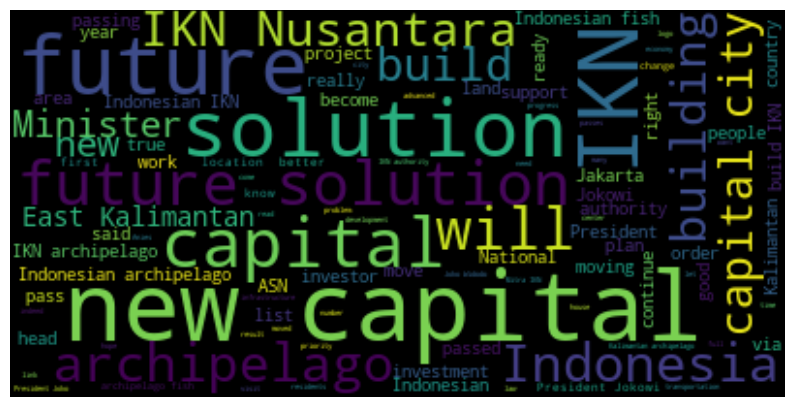

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tweet_All = " ".join(review for review in data['cleared_translate'])
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

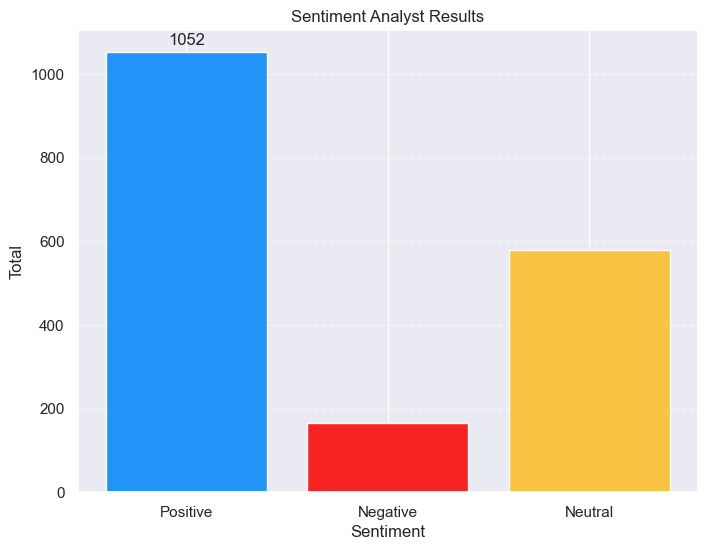

In [5]:
import seaborn as sns
sns.set_theme()

labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_total, negative_total, neutral_total]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=[8, 6])
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
  
  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)
    
    plt.show()

show_bar_chart(labels, counts, "Sentiment Analyst Results")

# 6. SENTIMENT CLASSIFICATION - NAIIVE BAYES CLASSIFIER

In [6]:
dataset = data.drop(['Classification'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [7]:
import random

set_positive = []
set_negative = []
set_neutral = []

for n in dataset:
  if(n[1] == 'Positive'):
    set_positive.append(n)
  elif(n[1] == 'Negative'):
    set_negative.append(n)
  else:
    set_neutral.append(n)

set_positive = random.sample(set_positive, k=int(len(set_positive)/2))
set_negative = random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral = random.sample(set_neutral, k=int(len(set_neutral)/2))

train = set_positive + set_negative + set_neutral
train_set = []

for n in train:
  train_set.append(n)

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

maxTweets = 3000
tweets_list = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('"IbuKotaNusantara" since:2022-01-24').get_items()):
  if i>maxTweets:
    break
  tweets_list.append([tweet.id, tweet.user.username, tweet.date, tweet.likeCount, tweet.content])

tweets_df = pd.DataFrame(tweets_list, columns=['Tweet ID', 'Username', 'Date', 'Like Count', 'Content'])
tweets_df.to_csv('output/scraped_tweets.csv', index=False)


Error retrieving https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22%5C%22IbuKotaNusantara%5C%22%20since%3A2022-01-24%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3At

ScraperException: 4 requests to https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22%5C%22IbuKotaNusantara%5C%22%20since%3A2022-01-24%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_counts_everywhere_api_enabled%22%3Atrue%2C%22longform_notetweets_consumption_enabled%22%3Atrue%2C%22tweet_awards_web_tipping_enabled%22%3Afalse%2C%22freedom_of_speech_not_reach_fetch_enabled%22%3Afalse%2C%22standardized_nudges_misinfo%22%3Atrue%2C%22tweet_with_visibility_results_prefer_gql_limited_actions_policy_enabled%22%3Afalse%2C%22interactive_text_enabled%22%3Atrue%2C%22responsive_web_text_conversations_enabled%22%3Afalse%2C%22longform_notetweets_rich_text_read_enabled%22%3Afalse%2C%22longform_notetweets_inline_media_enabled%22%3Afalse%2C%22responsive_web_enhance_cards_enabled%22%3Afalse%2C%22responsive_web_twitter_blue_verified_badge_is_enabled%22%3Atrue%7D failed, giving up.